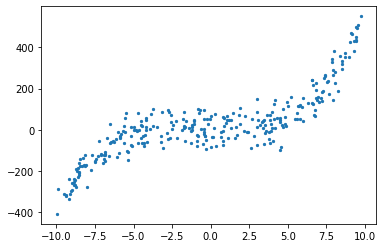

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(3)

def func(x, c): 
    return sum([c[i] * x**i for i in range(len(c))])
#y=c_2*x^3 + c_1*x^2 +c_0*x

num_data_points = 300
degree = 3

X = np.random.uniform(-10, 10, num_data_points)
c = [np.random.uniform(-3, 3) for _ in range(degree + 1)]
y = np.array( [func(X[i], c) for i in range(num_data_points)] )

mu, sigma = 0, 50
noise = np.random.normal(mu, sigma, num_data_points)

y = np.add(y, noise)

plt.scatter(X, y, s = 5)

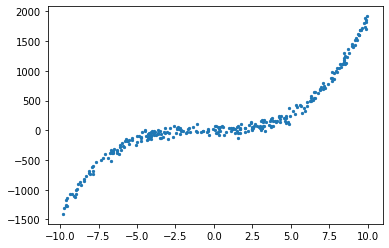

In [2]:
def create_poly_data(X=None, c=None, b=None, 
                     degree=3, num_points=300, 
                     X_lower=-10, X_higher=10, 
                     c_lower=-3, c_higher=3,
                     noise=True, noise_mu=0, 
                     noise_sigma=50, plot=False):
    
    def func(x, c): 
        return sum([c[i] * x**i for i in range(len(c))])
    
    if X == None: 
        X = np.random.uniform(X_lower, X_higher, num_points)
    if c == None: 
        c = [np.random.uniform(c_lower, c_higher) for _ in range(degree + 1)]
    
    y = np.array( [func(X[i], c) for i in range(num_points)] )
    
    if noise: 
        noise = np.random.normal(noise_mu, noise_sigma, num_points)
        y = [i + j for i, j in zip(y, noise)]
    
    if plot:
        plt.scatter(X, y, s = 5)
        plt.show()
        
    return X, c, y

X, c, y = create_poly_data(degree = 3, plot = True)

In [3]:
x_tr, y_tr = np.array(X[:len(X)*3//4]), np.array(y[:len(y)*3//4])
x_val, y_val = np.array(X[len(X)*3//4:]), np.array(y[len(y)*3//4:])

print('Training set length: {}\nValidation set length: {}'.format(len(x_tr), len(x_val)))

Training set length: 225
Validation set length: 75


In [4]:
W = [np.random.random() for _ in range(degree + 1)] #+1 is for W_0

In [5]:
def update_weights(degree, x, y):
    A = np.linalg.inv(np.array( 
        [ [sum(np.power(x, i)) for i in range(j, degree + 1 + j)] for j in range(degree + 1) ]
    ))

    return np.dot(A, np.array( [ sum(y * np.power(x, i)) for i in range(degree+1) ] ))

def predict(W, x):
    return sum([W[i] * x**i for i in range(len(W))])
    
W = update_weights(3, x_tr, y_tr)
g = predict(W, x_tr)

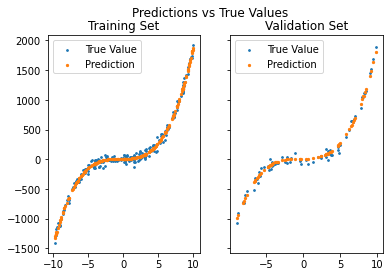

In [6]:
def plot_predictions(x_tr, y_tr, g, x_val, y_val, g_val):
    fig, axs = plt.subplots(1, 2, sharey = True)
    fig.suptitle('Predictions vs True Values')

    axs[0].scatter(x_tr, y_tr, s = 3, label = 'True Value')
    axs[0].scatter(x_tr, g, s = 5, label = 'Prediction')
    axs[0].legend()
    axs[0].set_title('Training Set')

    axs[1].scatter(x_val, y_val, s = 3, label = 'True Value')
    axs[1].scatter(x_val, g_val, s = 5, label = 'Prediction')
    axs[1].legend()
    axs[1].set_title('Validation Set')
    
    plt.show()
    
g_val = sum([W[i] * x_val**i for i in range(len(W))])

plot_predictions(x_tr, y_tr, g, x_val, y_val, g_val)

In [7]:
def RSE(y, g): 
    return sum(np.square(y - g)) / sum(np.square(y - 1 / len(y)*sum(y)))

error = RSE(y_val, g_val)
print('RSE: {}'.format(error))

R_squared = 1 - error
print('R_squared: {:.4f}'.format(R_squared))

RSE: 0.009639755181877954
R_squared: 0.9904


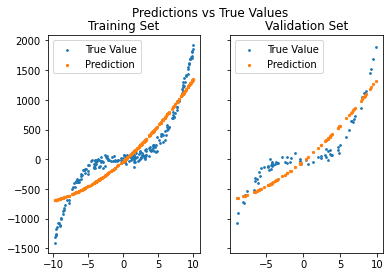

In [12]:
W = update_weights(2, x_tr, y_tr)
g = predict(W, x_tr)
g_val = sum([W[i] * x_val**i for i in range(len(W))])

plot_predictions(x_tr, y_tr, g, x_val, y_val, g_val)

In [13]:
def RSE(y, g): 
    return sum(np.square(y - g)) / sum(np.square(y - 1 / len(y)*sum(y)))

error = RSE(y_val, g_val)
print('RSE: {}'.format(error))

R_squared = 1 - error
print('R_squared: {:.4f}'.format(R_squared))

RSE: 0.20437951549203637
R_squared: 0.7956


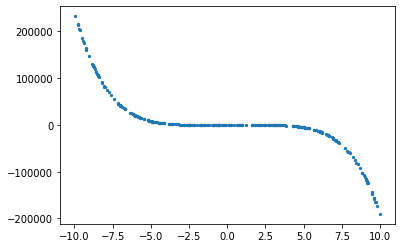

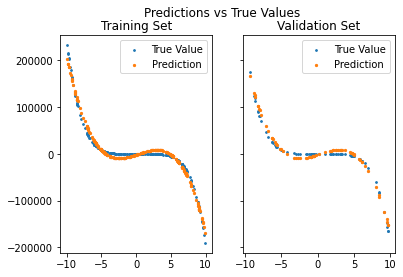

In [17]:
X, c, y = create_poly_data(degree = 5, plot = True)

x_tr, y_tr = np.array(X[:len(X)*3//4]), np.array(y[:len(y)*3//4])
x_val, y_val = np.array(X[len(X)*3//4:]), np.array(y[len(y)*3//4:])

W = update_weights(3, x_tr, y_tr)
g = predict(W, x_tr)
g_val = sum([W[i] * x_val**i for i in range(len(W))])

plot_predictions(x_tr, y_tr, g, x_val, y_val, g_val)